Using TensorFlow backend.


151893    3
58173     1
159937    3
170780    3
137932    3
147936    3
110170    2
19796     0
82827     1
178811    3
Name: LABEL, dtype: int64
[[0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]
Found 51412 unique tokens.
((135000, 130), (135000, 4), (45000, 130), (45000, 4))




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 130, 128)          1024000   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 130, 128)          0         
_________________________________________________________________
conv1d_1 

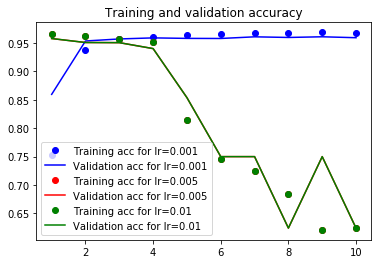

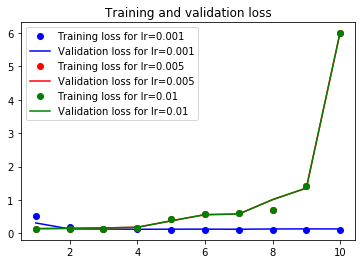

[[1. 1. 1. 0.]] entertainment


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.models import Sequential
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Conv1D, MaxPooling1D, Input, GlobalMaxPooling1D
from slim21 import LSTMs
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from keras.optimizers import RMSprop, SGD, Adam ,Adadelta
from keras.callbacks import Callback
from keras import backend as K
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

class exp_loss(Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.logs = []    
    def on_epoch_end(self,epoch,logs={}):
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        prev_ep_loss = self.val_losses[self.i]
        self.i += 1
        prev_lr = float(K.get_value(self.model.optimizer.lr))
        upd_lr = prev_lr * np.exp(prev_ep_loss)
        K.set_value(self.model.optimizer.lr, upd_lr)
        
        print('Test Loss:', self.val_losses)
        print('Current Epoch = ', self.i+1)
        print('Previous Learning Rate:', prev_lr)
        print('Updated Learning Rate:', upd_lr) 

data = pd.read_csv('news_dataset/uci-news-aggregator.csv', usecols=['TITLE', 'CATEGORY'])
#M class has way less data than the orthers, thus the classes are unbalanced.
data.CATEGORY.value_counts()

#I do aspire here to have balanced classes
num_of_categories = 45000
shuffled = data.reindex(np.random.permutation(data.index))
e = shuffled[shuffled['CATEGORY'] == 'e'][:num_of_categories]
b = shuffled[shuffled['CATEGORY'] == 'b'][:num_of_categories]
t = shuffled[shuffled['CATEGORY'] == 't'][:num_of_categories]
m = shuffled[shuffled['CATEGORY'] == 'm'][:num_of_categories]
concated = pd.concat([e,b,t,m], ignore_index=True)
#Shuffle the dataset
concated = concated.reindex(np.random.permutation(concated.index))
concated['LABEL'] = 0

#One-hot encode the lab
concated.loc[concated['CATEGORY'] == 'e', 'LABEL'] = 0
concated.loc[concated['CATEGORY'] == 'b', 'LABEL'] = 1
concated.loc[concated['CATEGORY'] == 't', 'LABEL'] = 2
concated.loc[concated['CATEGORY'] == 'm', 'LABEL'] = 3
print(concated['LABEL'][:10])
labels = to_categorical(concated['LABEL'], num_classes=4)
print(labels[:10])
if 'CATEGORY' in concated.keys():
    concated.drop(['CATEGORY'], axis=1)
'''
 [1. 0. 0. 0.] e
 [0. 1. 0. 0.] b
 [0. 0. 1. 0.] t
 [0. 0. 0. 1.] m
'''

n_most_common_words = 8000
max_len = 130
tokenizer = Tokenizer(num_words=n_most_common_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(concated['TITLE'].values)
sequences = tokenizer.texts_to_sequences(concated['TITLE'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

X = pad_sequences(sequences, maxlen=max_len)

X_train, X_test, y_train, y_test = train_test_split(X , labels, test_size=0.25, random_state=42)

epochs = 10
emb_dim = 128
batch_size = 64
labels[:2]

print((X_train.shape, y_train.shape, X_test.shape, y_test.shape))

model = Sequential()




#x1=Embedding(n_most_common_words, emb_dim, input_length=X.shape[1])
#x1=SpatialDropout1D(0.7)(x1)
#x1=lstmi5a(x1)

#x2=Embedding(n_most_common_words, emb_dim, input_length=X.shape[1])
#x1=SpatialDropout1D(0.7)(x2)
#x1=lstmi6(x2)
model = Sequential()
model.add(Embedding(n_most_common_words, emb_dim, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.3))
model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
model.add(LSTMs(implementation= 1, units=64,
                    activation='tanh' ,return_sequences=True,dropout=0.2, recurrent_dropout=0.3,
                    input_shape=X_train.shape[1:], model='LSTM5a'))
model.add(Dropout(0.2))
model.add(LSTMs(implementation= 1, units=64,
                    activation='tanh' ,dropout=0.2, recurrent_dropout=0.3,
                    input_shape=X_train.shape[1:], model='LSTM6'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='sigmoid'))


#model.add(lstmi5a)
#model.add(lstmi6)
#model.add(LSTM(64, dropout=0.7, recurrent_dropout=0.7))
#model.add(x1)
#model.add(x2)


#adam=Adam(lr=0.1, beta_1=0.9, beta_2=0.99, epsilon=1e-05, decay=0)
opt=RMSprop(lr=0.001, rho=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['acc'])
print(model.summary())
#history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=7, min_delta=0.0001)])
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2,callbacks=[exp_loss()])
#history= model.fit(X_train, y_train,
  #                        batch_size=batch_size,
   #                       epochs=epochs,
     #                      verbose=1,
      #                    validation_split=0.2)

accr = model.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))


#adam=Adam(lr=0.1, beta_1=0.9, beta_2=0.99, epsilon=1e-05, decay=0)
opt=RMSprop(lr=0.005, rho=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['acc'])
print(model.summary())
#history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=7, min_delta=0.0001)])
history1 = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2,callbacks=[exp_loss()])
#history= model.fit(X_train, y_train,
  #                        batch_size=batch_size,
   #                       epochs=epochs,
     #                      verbose=1,
      #                    validation_split=0.2)

accr = model.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

opt=RMSprop(lr=0.01, rho=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['acc'])
print(model.summary())
#history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=7, min_delta=0.0001)])
history2 = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2,callbacks=[exp_loss()])
#history= model.fit(X_train, y_train,
  #                        batch_size=batch_size,
   #                       epochs=epochs,
     #                      verbose=1,
      #                    validation_split=0.2)

accr = model.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

acc1 = history1.history['acc']
val_acc1 = history1.history['val_acc']
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']

acc2 = history1.history['acc']
val_acc2 = history1.history['val_acc']
loss2 = history1.history['loss']
val_loss2 = history1.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc for lr=0.001')
plt.plot(epochs, val_acc, 'b', label='Validation acc for lr=0.001')
plt.plot(epochs, acc1, 'ro', label='Training acc for lr=0.005')
plt.plot(epochs, val_acc1, 'r', label='Validation acc for lr=0.005')
plt.plot(epochs, acc2, 'go', label='Training acc for lr=0.01')
plt.plot(epochs, val_acc2, 'g', label='Validation acc for lr=0.01')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss for lr=0.001')
plt.plot(epochs, val_loss, 'b', label='Validation loss for lr=0.001')
plt.plot(epochs, loss1, 'ro', label='Training loss for lr=0.005')
plt.plot(epochs, val_loss1, 'r', label='Validation loss for lr=0.005')
plt.plot(epochs, loss2, 'go', label='Training loss for lr=0.01')
plt.plot(epochs, val_loss2, 'g', label='Validation loss for lr=0.01')
plt.title('Training and validation loss')
plt.legend()


plt.show()


txt = ["Regular fast food eating linked to fertility issues in women"]
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_len)
pred = model.predict(padded)
labels = ['entertainment', 'bussiness', 'science/tech', 'health']
print(pred, labels[np.argmax(pred)])

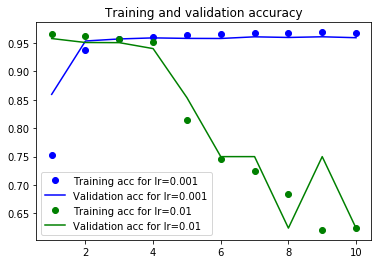

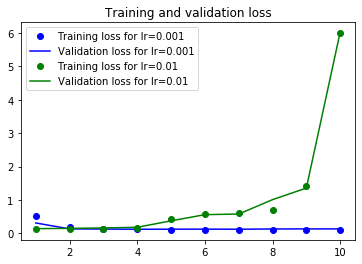

In [2]:
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc for lr=0.001')
plt.plot(epochs, val_acc, 'b', label='Validation acc for lr=0.001')
plt.plot(epochs, acc2, 'go', label='Training acc for lr=0.01')
plt.plot(epochs, val_acc2, 'g', label='Validation acc for lr=0.01')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss for lr=0.001')
plt.plot(epochs, val_loss, 'b', label='Validation loss for lr=0.001')
plt.plot(epochs, loss2, 'go', label='Training loss for lr=0.01')
plt.plot(epochs, val_loss2, 'g', label='Validation loss for lr=0.01')
plt.title('Training and validation loss')
plt.legend()


plt.show()